In [1]:
# Import libraries
import os
import numpy as np
import nmrformd as nmrmd
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from scipy.special import sph_harm

In [2]:
# For figure plotting
import sys
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
msize = 5
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue_light = [42/ 255, 99/255, 255/ 255] # [0/ 255, 150/255, 177/ 255]
myblue_dark = [43/ 255, 140/255, 238/ 255] # [0/ 255, 150/255, 177/ 255]
myred= [244/ 255, 143/255, 97/ 255] # [255/ 255, 77/255, 77/ 255]
mygreen = [122/255, 190/255, 165/255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
white = [0, 0, 0]
black = [1, 1, 1]
sys.path.append('../../shared/')
from tools import figure_improvement, save_figure

# Path to data
datapath = "../../raw-data/HEWL-in-water/"

alpha_m = [np.sqrt(16 * np.pi / 5), np.sqrt(8 * np.pi / 15), np.sqrt(32 * np.pi / 15)]

In [23]:
for folder in ["T300K_liquid/", "T300K_vapor/"]:
    # Import universe
    u = mda.Universe(datapath+folder+"conf.gro", datapath+folder+"prod.xtc")

    # Water
    water = u.select_atoms("name OW HW1 HW2")
    h_water = u.select_atoms("name HW1 HW2")

    # Protein
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name != 'OW') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    protein = u.select_atoms('name '+all_name)
    all_name_H = ' '
    for name in np.unique(u.atoms.names):
        if (name != 'OW') & (name != 'HW2') & (name != 'HW1') & (name[0] == 'H'):
            all_name_H += name + ' '
    h_protein = u.select_atoms('name '+all_name_H)

    # Calculate NMR properties
    nmr_water = nmrmd.NMR(u, h_water, number_i=50)
    nmr_protein = nmrmd.NMR(u, h_protein, number_i=25)

    plt.loglog(nmr_water.f[nmr_water.f<1e5], 1/nmr_water.R1[nmr_water.f<1e5], 's')
    plt.loglog(nmr_protein.f[nmr_protein.f<1e5], 1/nmr_protein.R1[nmr_protein.f<1e5], 'o')
    plt.loglog(nmr_protein.f[nmr_protein.f<1e5], 1/(nmr_protein.R1[nmr_protein.f<1e5]+nmr_water.R1[nmr_water.f<1e5]), '*')
    plt.show()

    plt.loglog(nmr_water.f[nmr_water.f<1e5], 1/nmr_water.R2[nmr_water.f<1e5], 's')
    plt.loglog(nmr_protein.f[nmr_protein.f<1e5], 1/nmr_protein.R2[nmr_protein.f<1e5], 'o')
    plt.loglog(nmr_protein.f[nmr_protein.f<1e5], 1/(nmr_protein.R2[nmr_protein.f<1e5]+nmr_water.R2[nmr_water.f<1e5]), '*')
    plt.show()


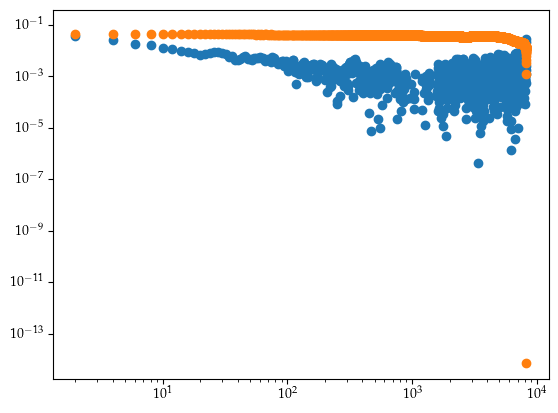

In [22]:
plt.loglog(nmr_water.t[:8000], nmr_water.gij[0][:8000], 'o')
plt.loglog(nmr_protein.t[:8000], nmr_protein.gij[0][:8000], 'o')

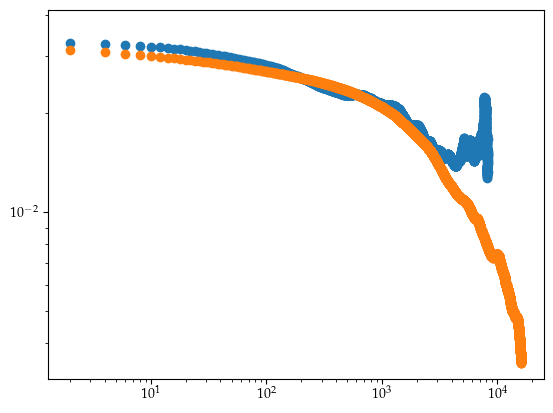

In [49]:
for T in [250, 300]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf_dry.gro", datapath+"T"+str(T)+"K/prod.xtc")
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name[0] == 'H') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    hydrogen_protein = u.select_atoms('name '+all_name)

    nmr_result = nmrmd.NMR(u, hydrogen_protein, number_i=20)

    plt.loglog(nmr_result.t[:8000], nmr_result.gij[0][:8000], 'o')